In [39]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
import tensorflow as tf
import numpy as np

### Wczytanie już poprawnie przetworzonych danych

In [40]:
train_df = pd.read_json(path_or_buf='../../data/processed/train_set.jsonl')
test_df = pd.read_json(path_or_buf='../../data/processed/test_set.jsonl')

In [41]:
train_df.head()

,session_id,offered_discount,price,Akcesoria telefoniczne,Anteny RTV,Audio,Biurowe urządzenia wielofunkcyjne,Drukarki i skanery,Gry PlayStation3,Gry Xbox 360,...,Zestawy słuchawkowe,Female,Male,session_length,n_views,month,day,hour,dayofweek,purchased
0,8570,0,117.94,0,0,0,0,0,0,0,...,0,0,1,150,1,4,18,21,5,1
1,3139,0,2614.56,0,0,0,0,0,0,0,...,0,1,0,179,2,4,5,5,6,1
2,7477,0,495.00,0,0,0,0,0,0,0,...,0,0,1,264,2,1,10,3,4,1
3,5109,0,169.80,0,0,0,0,0,2,0,...,0,0,1,134,2,5,2,4,5,0
4,4917,20,157.80,0,0,0,0,0,0,0,...,0,0,1,243,1,10,4,21,0,1


### Oddzielenie zmiennej celu od pozostałych atrybutów

In [42]:
y_train = train_df['purchased'].values
X_train = train_df.drop(columns=['session_id', 'purchased']).values
y_test = test_df['purchased'].values
X_test = test_df.drop(columns=['session_id', 'purchased']).values

In [43]:
X_train

array([[0.00000e+00, 1.17940e+02, 0.00000e+00, ..., 1.80000e+01,
        2.10000e+01, 5.00000e+00],
       [0.00000e+00, 2.61456e+03, 0.00000e+00, ..., 5.00000e+00,
        5.00000e+00, 6.00000e+00],
       [0.00000e+00, 4.95000e+02, 0.00000e+00, ..., 1.00000e+01,
        3.00000e+00, 4.00000e+00],
       ...,
       [0.00000e+00, 3.86000e+02, 0.00000e+00, ..., 2.20000e+01,
        2.00000e+00, 5.00000e+00],
       [0.00000e+00, 4.63404e+03, 0.00000e+00, ..., 2.00000e+01,
        1.20000e+01, 1.00000e+00],
       [0.00000e+00, 1.43700e+02, 0.00000e+00, ..., 7.00000e+00,
        2.10000e+01, 5.00000e+00]])

In [44]:
y_train

array([1, 1, 1, ..., 1, 1, 0])

### Podział zbioru danych na zbiór treningowy i testowy

## Analiza modeli

In [45]:
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
rand_forest_scores = cross_val_score(random_forest_reg, X_test, y_test, cv=10)
rand_forest_scores.mean()

0.965060162976336

### Las losowy

In [47]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
rand_forest_scores = cross_val_score(random_forest, X_test, y_test, cv=10, scoring="accuracy")
rand_forest_scores.mean()

0.9497821888186762

### KNN

In [49]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
knn_forest_scores = cross_val_score(knn, X_test, y_test, cv=10, scoring="accuracy")
knn_forest_scores.mean()

0.796606344341108

### SVM

In [51]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

SVC()

In [52]:
svm_scores = cross_val_score(svm, X_test, y_test, cv=10, scoring="accuracy")
svm_scores.mean()

0.5496410051854806

### Gradient Boosting

In [53]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [54]:
gradient_boosting_scores = cross_val_score(gradient_boosting, X_test, y_test, cv=3, scoring="accuracy")
gradient_boosting_scores.mean()

0.9284553484340293

### Sieć neuronowa

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=len(train_df.columns)-2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               4992      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 15,361
Trainable params: 15,361
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [62]:
model.fit(np.array(X_train, dtype=np.float64), np.array(y_train,dtype=np.float64), epochs=200)

Epoch 1/200
318/318 [==============================] - 0s 605us/step - loss: 8.8981 - accuracy: 0.5994
Epoch 2/200
318/318 [==============================] - 0s 625us/step - loss: 4.6185 - accuracy: 0.6381
Epoch 3/200
318/318 [==============================] - 0s 590us/step - loss: 4.8733 - accuracy: 0.6462
Epoch 4/200
318/318 [==============================] - 0s 591us/step - loss: 2.8123 - accuracy: 0.6651
Epoch 5/200
318/318 [==============================] - 0s 616us/step - loss: 2.2832 - accuracy: 0.6866
Epoch 6/200
318/318 [==============================] - 0s 608us/step - loss: 2.0407 - accuracy: 0.6911
Epoch 7/200
318/318 [==============================] - 0s 614us/step - loss: 1.6832 - accuracy: 0.6983
Epoch 8/200
318/318 [==============================] - 0s 601us/step - loss: 1.1331 - accuracy: 0.7067
Epoch 9/200
318/318 [==============================] - 0s 639us/step - loss: 0.9138 - accuracy: 0.7112
Epoch 10/200
318/318 [==============================] - 0s 608us/step - l

In [66]:
predictions_train = model.predict(np.array(X_train,dtype=np.float64)) > 0.5

In [67]:
predictions_test = model.predict(np.array(X_test,dtype=np.float64)) > 0.5

In [68]:
accuracy_score(y_test, predictions_test)

0.9690437972941985

In [69]:
cm_test = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_test))
cm_train = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train))

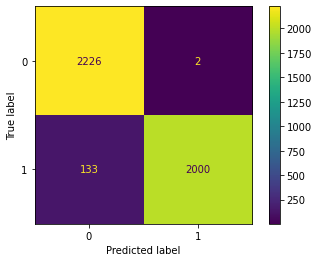

In [70]:
cm_test.plot()

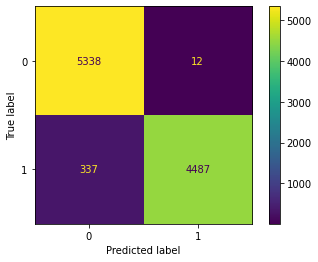

In [71]:
cm_train.plot()

In [72]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2228
           1       1.00      0.94      0.97      2133

    accuracy                           0.97      4361
   macro avg       0.97      0.97      0.97      4361
weighted avg       0.97      0.97      0.97      4361



In [73]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5350
           1       1.00      0.93      0.96      4824

    accuracy                           0.97     10174
   macro avg       0.97      0.96      0.97     10174
weighted avg       0.97      0.97      0.97     10174



## Wnioski:
Wybraliśmy las losowy ze względu na bardzo szybki trening i bardzo dobre wyniki oraz sieć neuronową